In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the cohort dataset
df = pd.read_csv('travel_tide.csv')

In [3]:
df

,user_id,session_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,destination_airport_lat,destination_airport_lon,base_fare_usd,trip_id.2,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd
0,447951,447951-dc80e75ea3234c0398a9911953386d90,NaN,2023-01-04 20:35:00,2023-01-04 20:35:52,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,449980,449980-e740c9ba5e3945db803565a5239b6d2e,NaN,2023-01-04 22:48:00,2023-01-04 22:50:10,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,485785,485785-b77e273846f34973993dae383568a47c,NaN,2023-01-05 18:24:00,2023-01-05 18:24:47,True,False,0.15,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,487352,487352-58491d5ab9d84a34ae58e6ccb3ade0c3,NaN,2023-01-05 09:01:00,2023-01-05 09:03:29,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,489949,489949-a3eec794414a4e13a5929e73c7157f1b,NaN,2023-01-05 20:58:00,2023-01-05 20:59:23,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,622343,622343-8de1e79234d94afca297fa7dee9af5ce,622343-2061dc37f60d410f9af97a51a7c8b676,2023-07-20 18:42:37,2023-07-20 19:51:01.770539,True,True,NaN,NaN,True,...,40.640,-73.779,214.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49207,480313,480313-f46ac4d965a2410e84ddf400ede116ad,480313-129a85cc3c5244b5962afe10c7932cda,2023-02-09 22:01:16,2023-02-10 00:01:16,True,True,NaN,NaN,True,...,37.362,-121.929,83.44,480313-129a85cc3c5244b5962afe10c7932cda,Shangri-La - san jose,2.0,1.0,2023-02-13 09:37:10.74,2023-02-15 11:00:00,174.0
49208,534295,534295-0a137c45cac34b1e834f23ecab4233fb,534295-3e20b84b40c946b1a8124395231d4412,2023-07-10 18:55:00,2023-07-10 18:57:18,False,False,NaN,NaN,True,...,32.699,-117.215,3205.63,534295-3e20b84b40c946b1a8124395231d4412,Aman Resorts - san diego,8.0,4.0,2023-07-20 20:54:53.1,2023-07-29 11:00:00,85.0
49209,518416,518416-fd45c188d94a4d30a7e4468056701f1e,518416-cca5cea3fac04cdf8d069e13891f016a,2023-07-15 07:38:00,2023-07-15 07:42:04,False,False,NaN,NaN,True,...,29.529,-98.279,103.01,518416-cca5cea3fac04cdf8d069e13891f016a,InterContinental - san antonio,1.0,2.0,2023-07-22 15:22:38.37,2023-07-24 11:00:00,80.0


# Spending on Hotel

In [4]:
# total spending on hotel
df['total_hotel_spent'] = df['rooms'] * df['hotel_per_room_usd'] * df['nights'] * df['hotel_discount_amount']

In [8]:
# get only the user_id and total_hotel_spent column
new_df = df[['user_id', 'total_hotel_spent']]
new_df

,user_id,total_hotel_spent
0,447951,NaN
1,449980,NaN
2,485785,NaN
3,487352,NaN
4,489949,NaN
...,...,...
49206,622343,NaN
49207,480313,NaN
49208,534295,NaN
49209,518416,NaN


In [10]:
# get total spending on hotel by each user, sort it descending order on total spent
new_df = new_df.groupby('user_id', as_index=False).sum('total_hotel_spent').sort_values('total_hotel_spent', ascending=False)

In [11]:
new_df

,user_id,total_hotel_spent
4296,568258,6300.00
4381,570746,3435.60
5955,730639,2504.00
2335,528953,1800.30
3453,548978,1640.80
...,...,...
723,504936,-31.20
3244,544926,-66.70
2582,532748,-66.75
2491,531467,-121.80


In [12]:
# get overall statistics using describe method
new_df['total_hotel_spent'].describe()

count    5998.000000
mean       33.587871
std       144.902403
min      -129.450000
25%         0.000000
50%         0.000000
75%         6.437500
max      6300.000000
Name: total_hotel_spent, dtype: float64

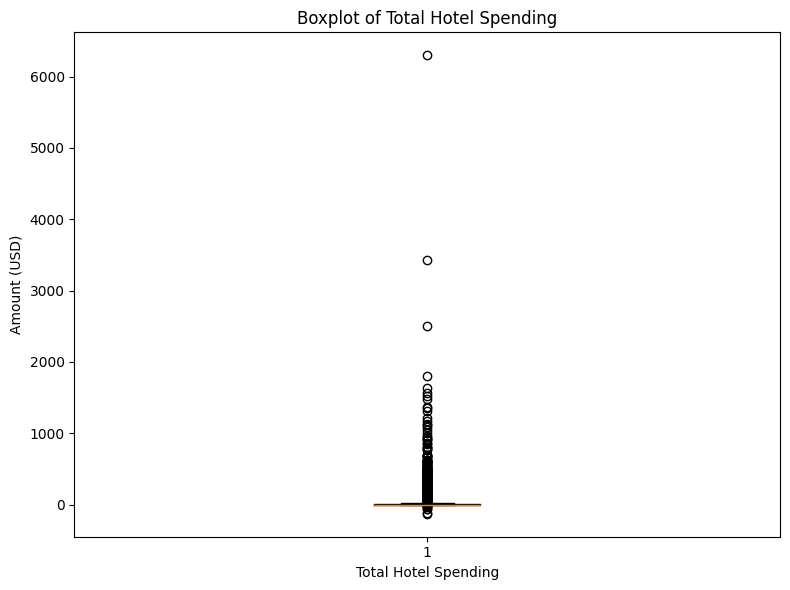

In [14]:
# show it in plot
plt.figure(figsize=(8, 6))
plt.boxplot(new_df['total_hotel_spent'])
plt.xlabel('Total Hotel Spending')
plt.ylabel('Amount (USD)')
plt.title('Boxplot of Total Hotel Spending')
# plt.xticks([1], ['Total Hotel Spending'])
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# users who spent more than 500 $
new_df[new_df['total_hotel_spent'] > 500].count()

user_id              60
total_hotel_spent    60
dtype: int64

In [20]:
# users who spent less than 100 $
new_df[new_df['total_hotel_spent'] < 100].count()

user_id              5460
total_hotel_spent    5460
dtype: int64

# Frequent booked users

In [25]:
# sessions with booking and no cancel
fbu = df[(df['trip_id'].notnull()) & (df['cancellation'] == False)]

In [26]:
fbu

,user_id,session_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,destination_airport_lon,base_fare_usd,trip_id.2,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd,total_hotel_spent
402,548859,548859-9b011308c86d46b0a97af20320b19a73,548859-b080407b3cdc4692a6c4e9fe4ef85627,2023-01-23 21:03:00,2023-01-23 21:09:52,False,True,NaN,0.1,True,...,-114.020,525.80,548859-b080407b3cdc4692a6c4e9fe4ef85627,Best Western - calgary,7.0,1.0,2023-01-29 19:05:46.995,2023-02-06 11:00:00,269.0,188.3
827,532279,532279-1a179e2189424b53bb56f8956d7b6ba5,532279-e8348444247b469eb9bc915beffff053,2023-02-08 13:45:00,2023-02-08 13:47:34,True,False,0.15,NaN,False,...,NaN,NaN,532279-e8348444247b469eb9bc915beffff053,NH Hotel - new york,12.0,2.0,2023-02-15 11:00:00,2023-02-27 11:00:00,208.0,NaN
869,575774,575774-7484f82c3fcc4338a6ee98f37dfe4733,575774-c1f81bbaea8841c8a13619fec71042e5,2023-02-08 16:27:00,2023-02-08 16:29:19,False,False,NaN,NaN,True,...,-80.943,340.63,575774-c1f81bbaea8841c8a13619fec71042e5,Fairmont - charlotte,5.0,1.0,2023-02-15 13:35:23.46,2023-02-21 11:00:00,134.0,NaN
947,548504,548504-c1f4807f7ced41a7ae4c268416b98870,548504-a5d29c872e0549b488ff615f1aef614b,2023-02-12 22:35:00,2023-02-12 22:37:23,False,False,NaN,NaN,True,...,-75.241,425.40,548504-a5d29c872e0549b488ff615f1aef614b,Aman Resorts - philadelphia,0.0,1.0,2023-02-19 14:39:43.56,2023-02-20 11:00:00,497.0,NaN
1072,555770,555770-ea2787aad15a434da2893e8ed54bfe79,555770-a75973f7da3e4e1c8345b378058696bb,2023-02-17 22:20:00,2023-02-17 22:23:15,False,False,NaN,NaN,True,...,-87.896,116.83,555770-a75973f7da3e4e1c8345b378058696bb,Accor - milwaukee,9.0,1.0,2023-02-26 10:43:32.25,2023-03-07 11:00:00,125.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49203,551990,551990-572e2a6219bc40d8a6c1f583820533f0,551990-fbb5ba1d6f1f43b58c6bc56e6b6dd288,2023-07-06 15:26:00,2023-07-06 15:27:54,False,False,NaN,NaN,False,...,NaN,NaN,551990-fbb5ba1d6f1f43b58c6bc56e6b6dd288,Starwood - chicago,17.0,1.0,2023-07-16 11:00:00,2023-08-02 11:00:00,175.0,NaN
49204,435231,435231-9f9d9e0971564942a7c8775c50812598,435231-203cc75819b846d59b96b38788174dd5,2023-07-12 19:13:00,2023-07-12 19:16:08,False,False,NaN,NaN,True,...,-83.010,52.88,435231-203cc75819b846d59b96b38788174dd5,Marriott - detroit,2.0,1.0,2023-07-18 16:24:16.785,2023-07-21 11:00:00,83.0,NaN
49208,534295,534295-0a137c45cac34b1e834f23ecab4233fb,534295-3e20b84b40c946b1a8124395231d4412,2023-07-10 18:55:00,2023-07-10 18:57:18,False,False,NaN,NaN,True,...,-117.215,3205.63,534295-3e20b84b40c946b1a8124395231d4412,Aman Resorts - san diego,8.0,4.0,2023-07-20 20:54:53.1,2023-07-29 11:00:00,85.0,NaN
49209,518416,518416-fd45c188d94a4d30a7e4468056701f1e,518416-cca5cea3fac04cdf8d069e13891f016a,2023-07-15 07:38:00,2023-07-15 07:42:04,False,False,NaN,NaN,True,...,-98.279,103.01,518416-cca5cea3fac04cdf8d069e13891f016a,InterContinental - san antonio,1.0,2.0,2023-07-22 15:22:38.37,2023-07-24 11:00:00,80.0,NaN


In [27]:
# get the user_id
fbu = fbu[['user_id']]
fbu

,user_id
402,548859
827,532279
869,575774
947,548504
1072,555770
...,...
49203,551990
49204,435231
49208,534295
49209,518416


In [29]:
# group by user, count the booked session in descending order
new_df = fbu.groupby('user_id', as_index=False).value_counts().sort_values('count', ascending=False)
new_df

,user_id,count
906,510841,8
4137,572554,8
1413,517491,8
768,509115,8
1112,513236,8
...,...,...
2139,528330,1
2141,528372,1
4515,587470,1
2142,528378,1


In [32]:
# summary
new_df['count'].describe()

count    5540.000000
mean        2.904693
std         1.364291
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: count, dtype: float64

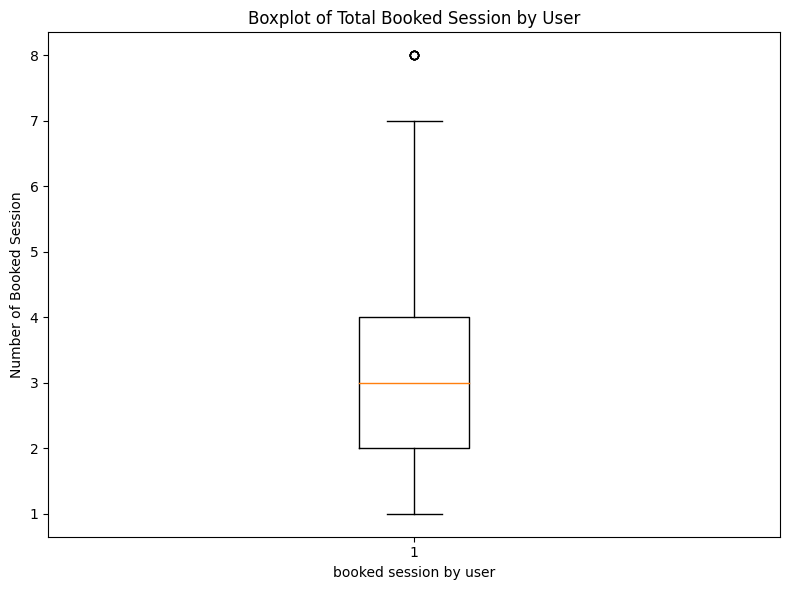

In [36]:
# show it in plot
plt.figure(figsize=(8, 6)) # figure size
plt.boxplot(new_df['count']) # boxplot
plt.xlabel('booked session by user') # x label
plt.ylabel('Number of Booked Session') # y label
plt.title('Boxplot of Total Booked Session by User') # plot title
# plt.xticks([1], ['Total Hotel Spending'])
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
# users who booked more than 4 trip
new_df[new_df['count'] > 4].count()

user_id    710
count      710
dtype: int64